In [1]:
!pip install pandas numpy scikit-learn tensorflow
!pip install openpyxl



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [5]:
#Loading the dataset
df = pd.read_csv(r"fake_news_merged_final.csv")
for col in df.columns:
    print(col)

ID
label
statement
subject
speaker
speaker_job
state_info
party_affiliation
barely_true_counts
false_counts
half_true_counts
mostly_true_counts
pants_on_fire_counts
context
sentiment
sentiment_score
sentiment_magnitude
anger
fear
joy
disgust
sad
speaker_id
list
sentiment_code
full_text
emotion
digit


In [7]:
df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion,digit
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,abortion says the annies list political group ...,"[0.121137,0.263479,0.008926,0.026096,0.531887,...",0
1,10540.json,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_,energy history job accomplishments when did th...,"[0.095352,0.016999,0.124566,0.191357,0.102045,...",1
2,324.json,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_,foreign policy hillary clinton agrees with joh...,"[0.039559,0.454228,0.024162,0.500384,0.052453,...",1
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_,NaN,"[0.004804,0.022509,0.194674,0.375055,0.383403,...",0
4,9028.json,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN,NaN,"[0.044237,0.045672,0.215996,0.222402,0.274343,...",1


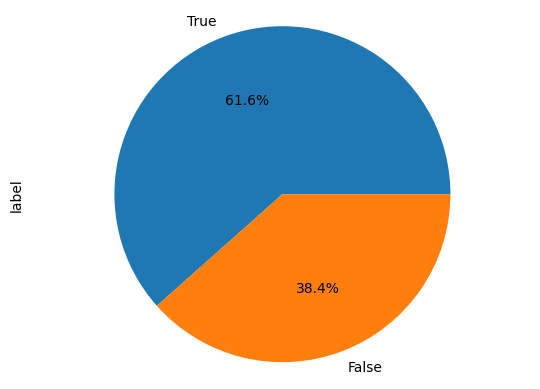

In [10]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [13]:
texts = df['full_text'].astype(str)
labels = df['label']

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

df.head()


,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion,digit
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,abortion says the annies list political group ...,"[0.121137,0.263479,0.008926,0.026096,0.531887,...",0
1,10540.json,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_,energy history job accomplishments when did th...,"[0.095352,0.016999,0.124566,0.191357,0.102045,...",1
2,324.json,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_,foreign policy hillary clinton agrees with joh...,"[0.039559,0.454228,0.024162,0.500384,0.052453,...",1
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_,NaN,"[0.004804,0.022509,0.194674,0.375055,0.383403,...",0
4,9028.json,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN,NaN,"[0.044237,0.045672,0.215996,0.222402,0.274343,...",1


In [15]:
print(df['label'])

0        False
1         True
2         True
3        False
4         True
         ...  
12781     True
12782     True
12783    False
12784     True
12785    False
Name: label, Length: 12786, dtype: bool


In [39]:
# Test model 1:


# train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# tokenizer = Tokenizer(num_words=10000)
# tokenizer.fit_on_texts(train_texts)

# train_sequences = tokenizer.texts_to_sequences(train_texts)
# test_sequences = tokenizer.texts_to_sequences(test_texts)

# max_sequence_length = max(len(seq) for seq in train_sequences)
# train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
# test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# model = Sequential()
# model.add(Embedding(10000, 128, input_length=max_sequence_length))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# _, accuracy = model.evaluate(test_data, test_labels)
# print('Accuracy:', accuracy)


In [16]:
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

model = Sequential()
model.add(Embedding(10000, 128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

_, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)


Epoch 1/10
560/560 [==============================] - 39s 67ms/step - loss: 0.6607 - accuracy: 0.6154 - val_loss: 0.6538 - val_accuracy: 0.6264
Epoch 2/10
560/560 [==============================] - 39s 70ms/step - loss: 0.5728 - accuracy: 0.6932 - val_loss: 0.7002 - val_accuracy: 0.5800
Epoch 3/10
560/560 [==============================] - 36s 65ms/step - loss: 0.3697 - accuracy: 0.8179 - val_loss: 0.8258 - val_accuracy: 0.5876
Epoch 4/10
560/560 [==============================] - 35s 63ms/step - loss: 0.2294 - accuracy: 0.8744 - val_loss: 1.0353 - val_accuracy: 0.5842
Epoch 5/10
560/560 [==============================] - 34s 61ms/step - loss: 0.1971 - accuracy: 0.8815 - val_loss: 1.1734 - val_accuracy: 0.5897
Epoch 6/10
560/560 [==============================] - 34s 61ms/step - loss: 0.1908 - accuracy: 0.8820 - val_loss: 1.2797 - val_accuracy: 0.5808
Epoch 7/10
560/560 [==============================] - 36s 64ms/step - loss: 0.1894 - accuracy: 0.8821 - val_loss: 1.3787 - val_accuracy:

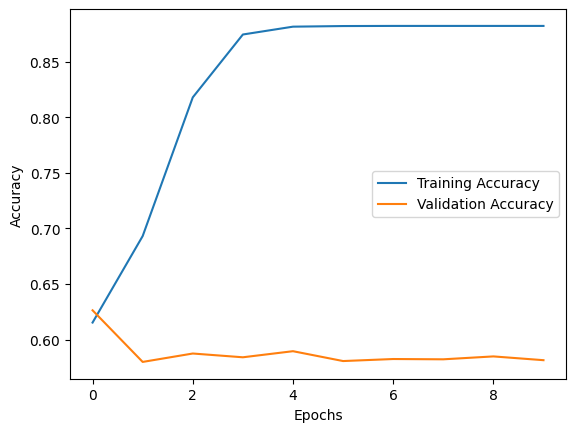

120/120 [==============================] - 4s 31ms/step


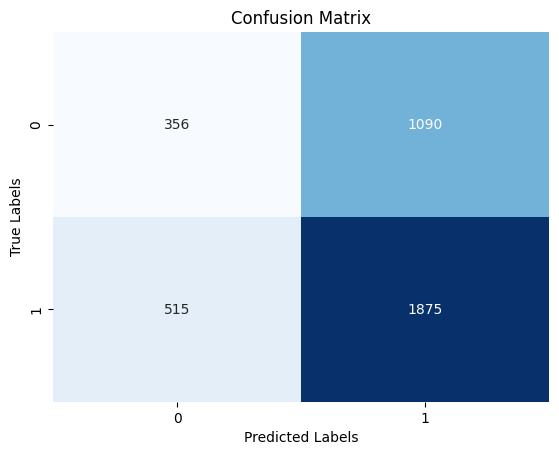

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train the model
# history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
